In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Ensemble Learning/kidney_disease.csv")

In [3]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df["classification"].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [6]:
# percentage of null values
(df.isnull().sum()/4).sort_values()

,0
id,0.00
classification,0.00
pe,0.25
appet,0.25
ane,0.25
cad,0.50
dm,0.50
htn,0.50
pcc,1.00
ba,1.00


In [7]:
df = df.drop(["rbc", "rc", "wc"], axis = 1)

In [8]:
df = df.bfill()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  htn             400 non-null    object 
 17  dm              400 non-null    obj

In [10]:
object_columns = df.select_dtypes(include = "object")
object_columns

,pc,pcc,ba,pcv,htn,dm,cad,appet,pe,ane,classification
0,normal,notpresent,notpresent,44,yes,yes,no,good,no,no,ckd
1,normal,notpresent,notpresent,38,no,no,no,good,no,no,ckd
2,normal,notpresent,notpresent,31,no,yes,no,poor,no,yes,ckd
3,abnormal,present,notpresent,32,yes,no,no,poor,yes,yes,ckd
4,normal,notpresent,notpresent,35,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,notpresent,notpresent,47,no,no,no,good,no,no,notckd
396,normal,notpresent,notpresent,54,no,no,no,good,no,no,notckd
397,normal,notpresent,notpresent,49,no,no,no,good,no,no,notckd
398,normal,notpresent,notpresent,51,no,no,no,good,no,no,notckd


In [11]:
object_columns_names = object_columns.columns
object_columns_names

Index(['pc', 'pcc', 'ba', 'pcv', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [12]:
for i in object_columns_names:
    print(f"Unique values in column '{i}'")
    print(df[i].unique())
    print('-'*50)

Unique values in column 'pc'
['normal' 'abnormal']
--------------------------------------------------
Unique values in column 'pcc'
['notpresent' 'present']
--------------------------------------------------
Unique values in column 'ba'
['notpresent' 'present']
--------------------------------------------------
Unique values in column 'pcv'
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
--------------------------------------------------
Unique values in column 'htn'
['yes' 'no']
--------------------------------------------------
Unique values in column 'dm'
['yes' 'no' ' yes' '\tno' '\tyes']
--------------------------------------------------
Unique values in column 'cad'
['no' 'yes' '\tno']
--------------------------------------------------
Unique values in column 'appet'
['good' 'poor']
---------------------

In [13]:
import numpy as np

In [14]:
df["pcv"] = df["pcv"].replace({'\t?': np.nan, '\t43' : "43"})
df["pcv"] = df["pcv"].astype(float)
df["dm"] = df["dm"].replace({' yes' : "yes", '\tno' : 'no', '\tyes' : 'yes'})
df["cad"] = df["cad"].replace({'\tno' : 'no'})
df["classification"] = df["classification"].replace({'ckd\t' : 'ckd'})

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["classification"] = le.fit_transform(df["classification"])

In [16]:
df = df.bfill()

In [17]:
df = pd.get_dummies(df, columns = ['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], drop_first = True)

In [18]:
df

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,classification,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,111.0,...,0,True,False,False,True,True,False,False,False,False
1,1,7.0,50.0,1.020,4.0,0.0,423.0,18.0,0.8,111.0,...,0,True,False,False,False,False,False,False,False,False
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,111.0,...,0,True,False,False,False,True,False,True,False,True
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0,False,True,False,True,False,False,True,True,True
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,142.0,...,0,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,1,True,False,False,False,False,False,False,False,False
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,1,True,False,False,False,False,False,False,False,False
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,1,True,False,False,False,False,False,False,False,False
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,1,True,False,False,False,False,False,False,False,False


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  classification  400 non-null    int64  
 14  pc_normal       400 non-null    bool   
 15  pcc_present     400 non-null    bool   
 16  ba_present      400 non-null    bool   
 17  htn_yes         400 non-null    boo

In [20]:
df = df.drop(["id"], axis = 1)

In [21]:
x = df.drop("classification", axis = 1)
y = df["classification"]

In [22]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, criterion = "gini", max_depth = 5, max_features = 5)

rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=20)

In [24]:
rfc.score(x_train, y_train)

1.0

In [25]:
rfc.score(x_test, y_test)

1.0

In [26]:
y_pred = rfc.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [28]:
rfc.predict_proba(x_test)

array([[1.00000000e+00, 0.00000000e+00],
       [5.91844197e-02, 9.40815580e-01],
       [5.72613428e-02, 9.42738657e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.18441970e-03, 9.90815580e-01],
       [1.00000000e+00, 0.00000000e+00],
       [9.50000000e-01, 5.00000000e-02],
       [1.00000000e+00, 0.00000000e+00],
       [9.96969697e-01, 3.03030303e-03],
       [1.00000000e+00, 0.00000000e+00],
       [2.73280679e-03, 9.97267193e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [2.73280679e-03, 9.97267193e-01],
       [9.96969697e-01, 3.03030303e-03],
       [9.00809730e-01, 9.91902701e-02],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [8.09729871e-04, 9.99190270e-01],
       [1.00000000e+00, 0.00000000e+00],
       [9.18441970e-03, 9.90815580e-01],
       [1.000000

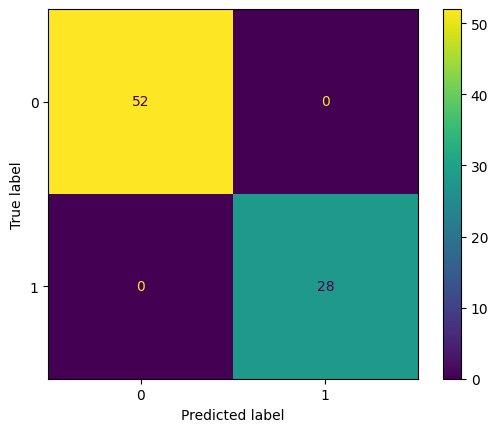

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()